In [2]:
from scipy.stats import norm
import scipy
from scipy.interpolate import LinearNDInterpolator
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

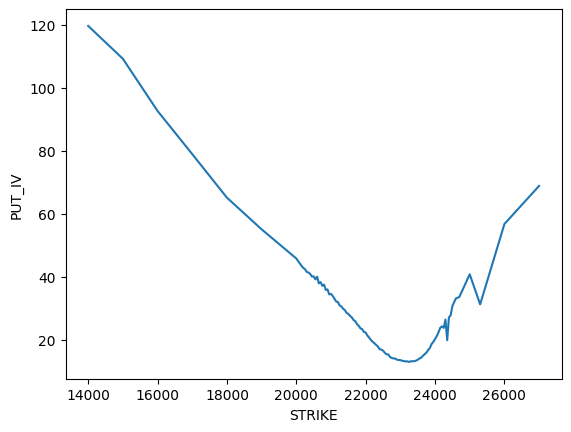

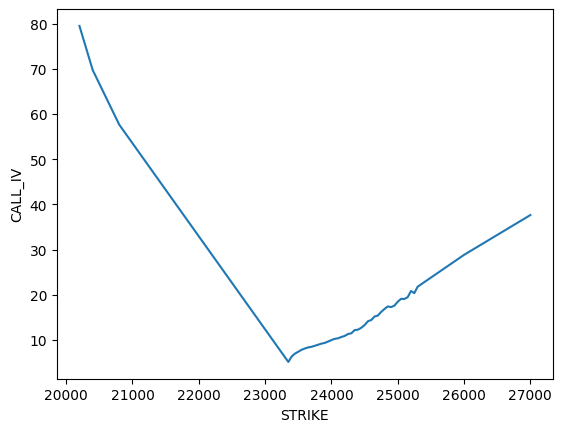

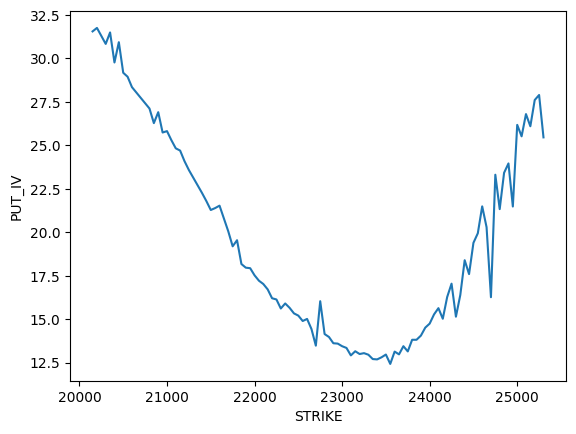

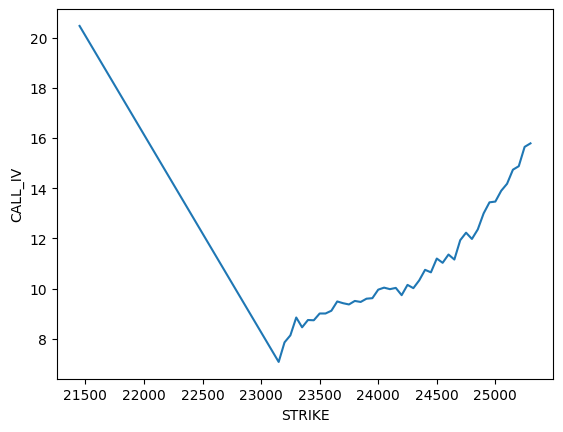

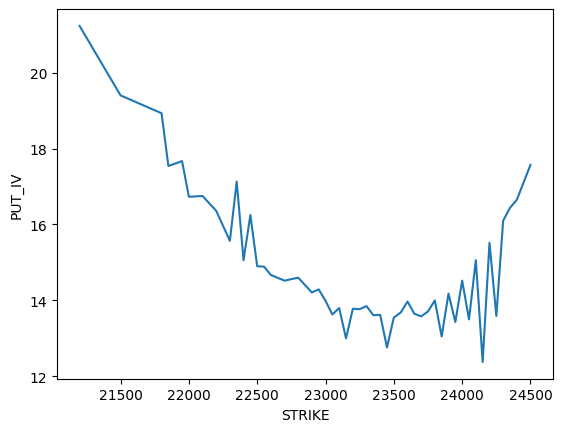

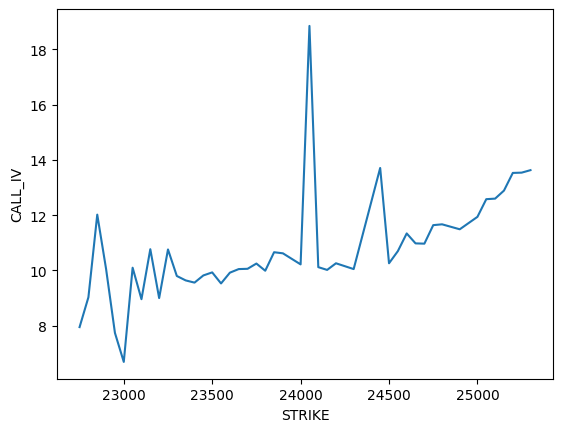

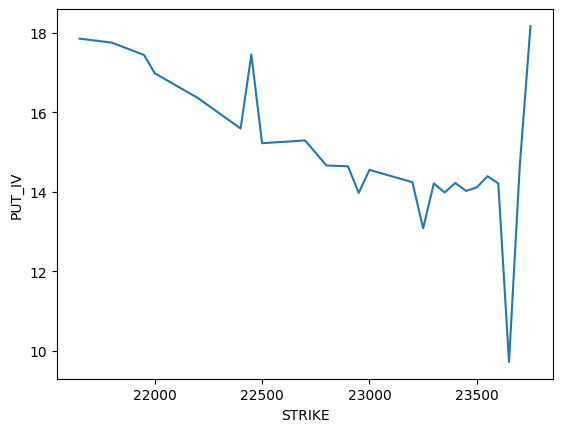

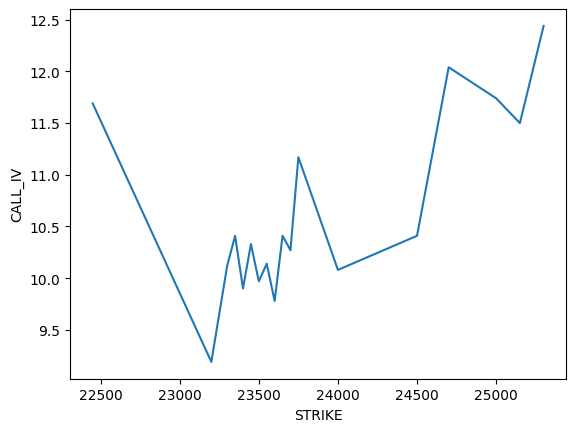

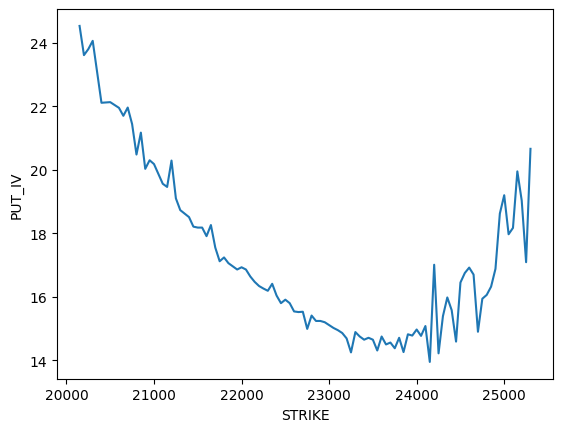

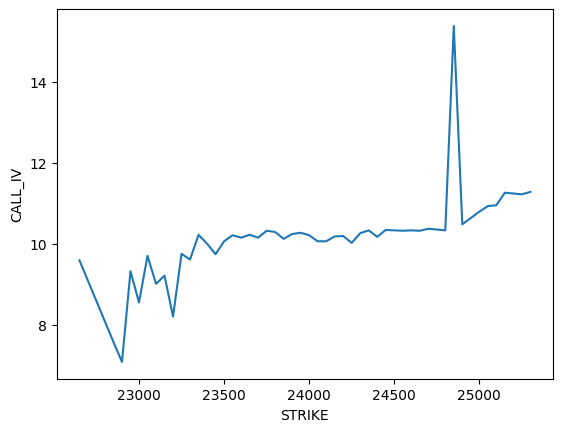

In [3]:
today = '22_Jun_2024'
CALL_DATA = []
PUT_DATA = []
DATA = []
call_files = ['Calls_27_Jun_2024_NIFTY_50_23501.csv','Calls_04_Jul_2024_NIFTY_50_23501.csv','Calls_11_Jul_2024_NIFTY_50_23501.csv','Calls_18_Jul_2024_NIFTY_50_23501.csv','Calls_25_Jul_2024_NIFTY_50_23501.csv']
put_files =['Puts_27_Jun_2024_NIFTY_50_23501.csv','Puts_04_Jul_2024_NIFTY_50_23501.csv','Puts_11_Jul_2024_NIFTY_50_23501.csv','Puts_18_Jul_2024_NIFTY_50_23501.csv','Puts_25_Jul_2024_NIFTY_50_23501.csv']
for call_file,put_file in zip(call_files,put_files):
    calls = pd.read_csv(call_file)
    puts = pd.read_csv(put_file)
    
    puts1 = puts[puts["IV"] != '-']
    
    #puts1["IV"] = puts1["IV"].astype(float)
    #puts1.dtypes
    puts1 = puts1.reset_index(drop=True)
    for i in range(len(puts1)):
        puts1.loc[i, "STRIKE"] = float(puts1.loc[i, "STRIKE"].replace(',',""))
        puts1.loc[i, "BID"] = puts1.loc[i, "BID"].replace(',',"")
        if puts1.loc[i, "BID"] == "-":
            puts1.loc[i, "BID"] = float("inf")
        puts1.loc[i, "BID"] = float(puts1.loc[i, "BID"])
        puts1.loc[i, "ASK"] = puts1.loc[i, "ASK"].replace(',',"")
        if puts1.loc[i, "ASK"] == "-":
            puts1.loc[i, "ASK"] = "inf"
        puts1.loc[i, "ASK"] = float(puts1.loc[i, "ASK"])
        puts1.loc[i, "IV"] = float(puts1.loc[i, "IV"])
    

    plt.plot(puts1["STRIKE"], puts1["IV"])
    plt.xlabel("STRIKE")
    plt.ylabel("PUT_IV")
    plt.show()
    puts1["STRIKE"] = puts1["STRIKE"].astype(float)
    puts1["IV"] = puts1["IV"].astype(float)
    puts1["EXPIRY"]= (datetime.strptime(put_file[5:16],'%d_%b_%Y')-datetime.strptime(today,'%d_%b_%Y')).total_seconds()/(60*60*24)
    puts1["TYPE"] = "PUT"
    puts1["PRICE"] = (np.array(puts1["BID"].astype(float))+np.array(puts1["ASK"].astype(float)))/2
    
    PUT_DATA.append(puts1)
    DATA.append(puts1)
    calls1 = calls[calls["IV"] != '-']
    calls1 = calls1.reset_index(drop=True)
    #puts1["IV"] = puts1["IV"].astype(float)
    #puts1.dtypes
    for i in range(len(calls1)):
        calls1.loc[i, "STRIKE"] = float(calls1.loc[i, "STRIKE"].replace(',',""))
        calls1.loc[i, "BID"] = calls1.loc[i, "BID"].replace(',',"")
        if calls1.loc[i, "BID"] == "-":
            calls1.loc[i, "BID"] = float("inf")
        calls1.loc[i, "BID"] = float(calls1.loc[i, "BID"])
        calls1.loc[i, "ASK"] = calls1.loc[i, "ASK"].replace(',',"")
        if calls1.loc[i, "ASK"] == "-":
            calls1.loc[i, "ASK"] = float("inf")
        calls1.loc[i, "ASK"] = float(calls1.loc[i, "ASK"])
        calls1.loc[i, "IV"] = float(calls1.loc[i, "IV"])

    plt.plot(calls1["STRIKE"], calls1["IV"])
    plt.xlabel("STRIKE")
    plt.ylabel("CALL_IV")
    plt.show()
    calls1["STRIKE"] = calls1["STRIKE"].astype(float)
    calls1["IV"] = calls1["IV"].astype(float)
    calls1["EXPIRY"]= (datetime.strptime(call_file[6:17],'%d_%b_%Y')-datetime.strptime(today,'%d_%b_%Y')).total_seconds()/(60*60*24)
    calls1["TYPE"] = "CALL"
    calls1["PRICE"] = (np.array(calls1["BID"].astype(float))+np.array(calls1["ASK"].astype(float)))/2
    CALL_DATA.append(calls1)
    DATA.append(calls1)
#print(CALL_DATA,PUT_DATA)
CALL_DATA = pd.concat(CALL_DATA,axis = 0).reset_index(drop=True)
PUT_DATA = pd.concat(PUT_DATA,axis = 0).reset_index(drop=True)
#print(PUT_DATA["EXPIRY"][0])
DATA = pd.concat(DATA,axis = 0).reset_index(drop=True)
#print(CALL_DATA["STRIKE"][0])
#DATA
#print(PUT_DATA)

In [4]:

S_0 = 23501
r = 0.05


In [ ]:
def check_arbitrage(data):
    call_data = data[data["TYPE"] == "CALL"].reset_index(drop=True)
    put_data = data[data["TYPE"] == "PUT"].reset_index(drop=True)
    #print(len(call_data))
    arb_opp = []
    epsilon = 10
    
    for i in range(len(call_data)):
        for j in range(len(put_data)):
            #print(type(call_data.loc[:, "EXPIRY"]), call_data.loc[i, "STRIKE"])
            if (call_data.loc[i, "EXPIRY"] == put_data.loc[j, "EXPIRY"]) and (call_data.loc[i, "STRIKE"] == put_data.loc[j, "STRIKE"]):
                if abs(call_data.loc[i, "PRICE"] + call_data.loc[i, "STRIKE"]/(1+r/365)**call_data.loc[i, "EXPIRY"] - put_data.loc[j, "PRICE"] - S_0) > epsilon:
                    arb_opp.append({"Call":[i],"Put":[j]})

    for i in range(len(call_data)):
        for j in range(i+1, len(call_data)):
            if call_data.loc[i, "EXPIRY"] == call_data.loc[j, "EXPIRY"]:
                if (call_data.loc[i, "STRIKE"]-call_data.loc[j, "STRIKE"])*(call_data.loc[i, "PRICE"]-call_data.loc[j, "PRICE"]) < 0:
                    arb_opp.append({"Call":[i,j]})

#     for i in range(len(call_data)):
#         for j in range(i+1, len(call_data)):
#             for k in range(j+1, len(call_data)):
#                 prices = [call_data.loc[i, "PRICE"], call_data.loc[j, "PRICE"], call_data.loc[k, "PRICE"]]
#                 strikes = [call_data.loc[i, "STRIKE"], call_data.loc[j, "STRIKE"], call_data.loc[k, "STRIKE"]]
#                 if abs(np.log(abs((strikes[2]-strikes[0])*(prices[1]-prices[0])))-np.log(abs((strikes[1]-strikes[0])*(prices[2]-prices[0])))) > 2:
#                     arb_opp.append({"Call":[i,j,k]})

    for i in range(len(put_data)):
        for j in range(i+1, len(put_data)):
            if put_data.loc[i, "EXPIRY"] == put_data.loc[j, "EXPIRY"]:
                if (put_data.loc[i, "STRIKE"]-put_data.loc[j, "STRIKE"])*(put_data.loc[i, "PRICE"]-put_data.loc[j, "PRICE"]) < 0:
                    arb_opp.append({"Put":[i,j]})

#     for i in range(len(put_data)):
#         for j in range(i+1, len(put_data)):
#             for k in range(j+1, len(put_data)):
#                 prices = [put_data.loc[i, "PRICE"], put_data.loc[j, "PRICE"], put_data.loc[k, "PRICE"]]
#                 strikes = [put_data.loc[i, "STRIKE"], put_data.loc[j, "STRIKE"], put_data.loc[k, "STRIKE"]]
#                 if abs(np.log(abs((strikes[2]-strikes[0])*(prices[1]-prices[0])))-np.log(abs(((strikes[1]-strikes[0])*(prices[2]-prices[0]))))) > 2:
#                     arb_opp.append({"Put":[i,j,k]})
    return arb_opp


    

In [ ]:
print(check_arbitrage(DATA))

In [13]:
def LSV(sigma):
   global S_0 
   stocks = []
   dt = 0.01 
   n = 1000
   for i in range(n):
      ds = r/365*S_0*dt + sigma(i*dt,S_0)*S_0*np.random.normal(loc=0, scale=np.sqrt(dt),size=None)
      S_0 = S_0 + ds
      if i%100 == 0:
         stocks.append(S_0) # Stock value every day
   return stocks
def der_t(price,T,K):
  dt = 0.01
  return (price(T+dt,K)-price(T-dt,K))/(2*dt)
def der_x(price,T,K):
  ds = 1
  return (price(T,K+ds)-price(T,K-ds))/(2*ds)
def der2_x(price,T,K):
  ds = 1
  return (price(T,K+ds)-2*price(T,K)+price(T,K-ds))/(ds*ds)
def generate_volatility(price,T,K):
   return np.sqrt((2*der_t(price,T,K)+2*r/365*K*der_x(price,T,K))/(der2_x(price,T,K)))

In [17]:
def bsmcall(vol,T,K):
    T = T/365
    dp = (1/vol*T**0.5)*(np.log(S_0/K)+(r+0.5*vol**2)*T)
    dm = (1/vol*T**0.5)*(np.log(S_0/K)+(r-0.5*vol**2)*T)
    pk = S_0*norm.cdf(dp)-K*np.exp(-r*T)*norm.cdf(dm)
    return pk
def price(ivs):
  return lambda T,K: bsmcall(ivs(T,K),T,K)
iv = CALL_DATA["IV"]
strike = CALL_DATA["STRIKE"]
expiry = CALL_DATA["EXPIRY"]
ivs= lambda T,K: LinearNDInterpolator(list(zip(expiry,strike)), list(iv))(T,K)/100
print(ivs(5,25000))
sigma = lambda T,K:generate_volatility(price(ivs),T,K)
print(price(ivs)(20,22000))
#ivs = lambda T,K: np.interp(K,strike,iv)

0.1845
(nan+nanj)


In [15]:
print(LSV(sigma))

/tmp/ipykernel_2929091/1099912238.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  ivs= lambda T,K: LinearNDInterpolator(list(zip(expiry,strike)), list(iv))(T,K)/100
/tmp/ipykernel_2929091/1099912238.py:3: RuntimeWarning: invalid value encountered in scalar divide
  dp = (1/vol*T**0.5)*(np.log(S_0/K)+(r+0.5*vol**2)*T)
/tmp/ipykernel_2929091/1099912238.py:4: RuntimeWarning: invalid value encountered in scalar divide
  dm = (1/vol*T**0.5)*(np.log(S_0/K)+(r-0.5*vol**2)*T)
/tmp/ipykernel_2929091/172841527.py:22: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt((2*der_t(price,T,K)+2*r/365*K*der_x(price,T,K))/(der2_x(price,T,K)))


[(nan+nanj), (nan+nanj), (nan+nanj), (nan+nanj), (nan+nanj), (nan+nanj), (nan+nanj), (nan+nanj), (nan+nanj), (nan+nanj)]
